In [1]:
import sys
sys.path.append("./../")

# Run the following line to install the required libraries
# %pip install --user -r ./../requirements.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
from src.characterization.preprocessing import Characterization, Parameters, CharacterizationPixel
from src.interface.characterization import CharacterizationInterface

## Interferometer transfer function model

The user can choose the value different parameters to construct the transfer function of a simple interferometer.
Each parameter is assumed here to be constant with the wavenumbers.

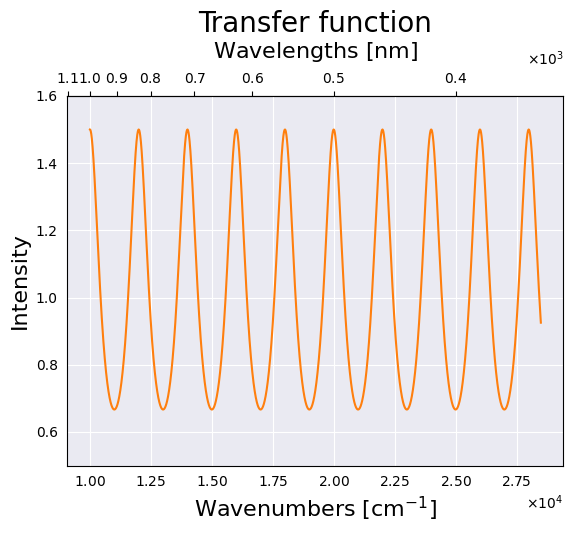

In [3]:
def interferometry_example(opd=5, reflectivity=0.2, gain=1, phase_shift=0, model=0):
    wavenumbers = np.linspace(1, 2.85, 10000, endpoint=False)

    interferometer = Characterization(
        Parameters(
            opd=opd,
            reflectivity=reflectivity,
            gain=gain,
            phase_shift=phase_shift,
        ),
        model=model,
    )
    fig, ax = interferometer.visualize(wavenumbers=wavenumbers, color="C1")
    ax.set_ylim((0.5, 1.6))
    plt.show()

# Fixed visualization
interferometry_example()

# # Slider visualization
# parameters_range = {
#     "opd": (1, 10),
#     "reflectivity": (0, 0.4, 0.01),
#     "gain": (0.5, 1.5, 0.01),
#     "phase_shift": (0, 6.28),
#     "model": [0, 2, 3],
# }
# ipywidgets.interact(interferometry_example, **parameters_range);

## Comparing with the acquired dataset

It is possible to load some acquired characterization dataset to visually compare the accuracy of our model. The interaction shows that the dependency of the parameters with the wavenumbers is mandatory for a more accurate representation of the results. The default values for the parameters were obtained with the Maximum Likelihood (ML) method.

In [4]:
# Loading the acquisition dataset
interferometer = 40
reference_folder = "../data/acquisitions/imspoc_uv_2"
acquisition = CharacterizationPixel.load(folder=reference_folder)

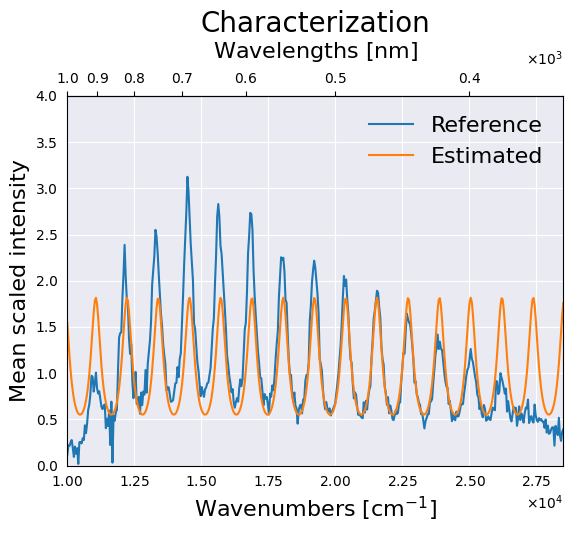

In [5]:
def characterization_compare(transfer, wavenumbers, opd=8.58, reflectivity=0.29, phase_shift=3.083, gain=4.73, model=0):
    gain = gain * 1e+9
    characterization = Characterization(
        Parameters(
            opd=opd,
            reflectivity=reflectivity,
            gain=gain,
            phase_shift=phase_shift,
        ),
        model=model,
    )
    _, ax = characterization.visualize_compare(transfer=transfer, wavenumbers=wavenumbers)
    ax.set_ylim((0, 4))
    plt.show()

# Fixed visualization
characterization_compare(transfer=acquisition.data[interferometer, :][np.newaxis, :], wavenumbers=acquisition.central_wavenumbers)

# # Slider visualization
# parameters_range = {
#     "opd": (5, 15, 0.1),
#     "reflectivity": (0, 0.5, 0.01),
#     "gain": (0, 10, 0.1),
#     "phase_shift": (0, 6.28),
#     "model": [0, 2, 3],
# }
# ipywidgets.interact(
#     characterization_compare, 
#     transfer=ipywidgets.fixed(acquisition.data[interferometer, :][np.newaxis, :]),
#     wavenumbers=ipywidgets.fixed(acquisition.central_wavenumbers),
#     **parameters_range
# );

## Comparison with IRCA results
We load the results of our proposed modelization of the transfer function, obtained running our proposed interferometry response characterization algorithm (IRCA); in particular, we allow the gain and the reflectivity to be modeled with a polynomial function of degree 5.

In [6]:
reference_folder = "../data/acquisitions/imspoc_uv_2"
characterization_folder = "../data/characterization/imspoc_uv_2"

acquisition = CharacterizationPixel.load(folder=reference_folder)
characterization = Characterization.load(load_folder=characterization_folder)

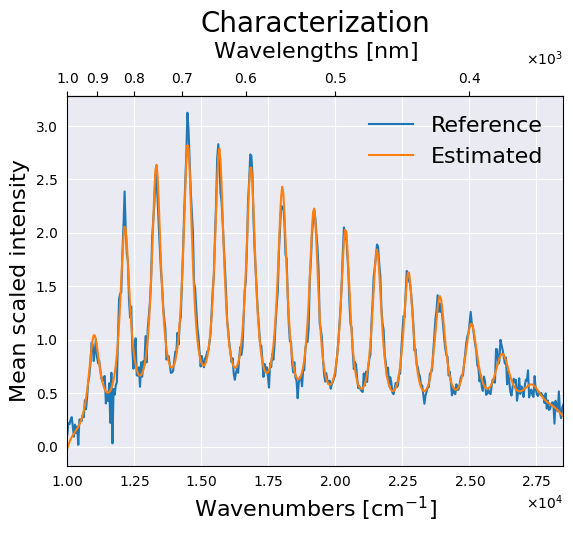

In [7]:
def visualize_characterization(characterization, acquisition, interferometer=40):
    characterization.visualize_compare(
        transfer=acquisition.data, 
        wavenumbers=acquisition.central_wavenumbers, 
        interferometer=interferometer,
    )
    plt.show()

# Fixed visualization
visualize_characterization(characterization=characterization, acquisition=acquisition)

# # Slider visualization
# ipywidgets.interact(
#     visualize_characterization,
#     characterization=ipywidgets.fixed(characterization),
#     acquisition=ipywidgets.fixed(acquisition), 
#     interferometer=(0, 318)
# );